In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob

In [2]:
folder = "/home/jf/data/test"

In [10]:
files_names = list(glob.glob(folder+ "/ImagesGroundRemoved/*.tif"))
files_names = [filename.split('/')[-1].replace("_max.tif", '') for filename in files_names]
files_names


['PUNKTSKY_00005_1km_6146_468',
 'PUNKTSKY_00005_1km_6219_494',
 'PUNKTSKY_00005_1km_6161_465',
 'PUNKTSKY_00005_1km_6205_513',
 'PUNKTSKY_00005_1km_6204_505',
 'PUNKTSKY_00005_1km_6167_473',
 'PUNKTSKY_00005_1km_6167_475',
 'PUNKTSKY_00005_1km_6167_474',
 'PUNKTSKY_00005_1km_6162_472',
 'PUNKTSKY_00005_1km_6221_452',
 'PUNKTSKY_00005_1km_6220_495',
 'PUNKTSKY_00005_1km_6134_518',
 'PUNKTSKY_00005_1km_6168_458',
 'PUNKTSKY_00005_1km_6211_474',
 'PUNKTSKY_00005_1km_6163_472']

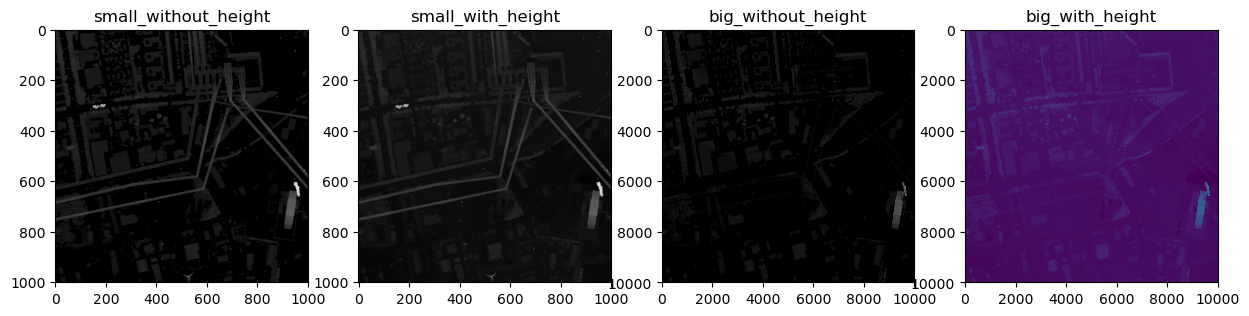

KeyboardInterrupt: 

In [5]:
for filename in files_names:
    max_image = cv2.imread(f'{folder}/ImagesGroundRemoved/{filename}_max.tif', cv2.IMREAD_UNCHANGED)
    max_image = np.where(max_image >= 0, max_image, 0)
    max_image = max_image/np.max(max_image)
    max_image = (max_image*255).astype(np.uint8)


    std_image = cv2.imread(f'{folder}/ImagesGroundStdevRemoved/{filename}_stdev.tif', cv2.IMREAD_UNCHANGED)
    std_image = np.where(std_image >= 0, std_image, 0)
    std_image = std_image/np.max(std_image)
    std_image = (std_image*255).astype(np.uint8)

    count_image = cv2.imread(f'{folder}/ImagesGroundCountRemoved/{filename}_count.tif', cv2.IMREAD_UNCHANGED)
    count_image = np.where(count_image >= 0, count_image, 0)
    count_image = count_image/np.max(count_image)
    count_image = (count_image*255).astype(np.uint8)


    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15,15))
    ax0.set_title('Max')
    ax0.imshow(max_image, cmap='gray')
    ax1.set_title('Stdev')
    ax1.imshow(std_image, cmap='gray')
    ax2.set_title('Count')
    ax2.imshow(count_image, cmap='gray')
    arrays = [max_image, std_image, count_image]
    staked_image = np.stack(arrays, axis=0).transpose((1, 2, 0))
    ax3.set_title('Combine')
    ax3.imshow(staked_image)


    #ax0.axis('off')
    #ax1.axis('off')
    #ax2.axis('off')
    plt.show()


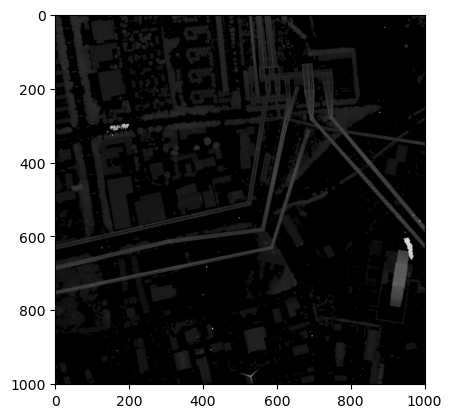

In [12]:
filename = files_names[0]

max_image = cv2.imread(f'{folder}/ImagesGroundRemoved/{filename}_max.tif', cv2.IMREAD_UNCHANGED)
max_image = np.where(max_image >= 0, max_image, 0)
max_image = max_image/np.max(max_image)
max_image = (max_image*255).astype(np.uint8)
plt.imshow(max_image, cmap='gray')
plt.show()

In [19]:
network_size = 10
image_size = max_image.shape[0]
amount_of_crops = image_size // network_size
# print(f"{network_size = }")
# print(f"{image_size = }")
# print(f"{amount_of_crops = }")
image_list = []
for i in range(amount_of_crops):

    for j in range(amount_of_crops):
        # print(f"{i=}")
        # print(f"{j=}")
        # print(network_size*i)
        x_start_index = network_size*i
        x_end_index = network_size*(i+1)
        y_start_index = network_size*j
        y_end_index = network_size*(j+1)
        # print(f"x start index {x_start_index}, x end index {x_end_index}")
        # print(f"y start index {y_start_index}, y end index {y_end_index}")
        show_image = max_image[x_start_index:x_end_index,y_start_index:y_end_index]
        image_list.append(show_image)
        # plt.imshow(show_image, cmap='gray')
        # plt.show()

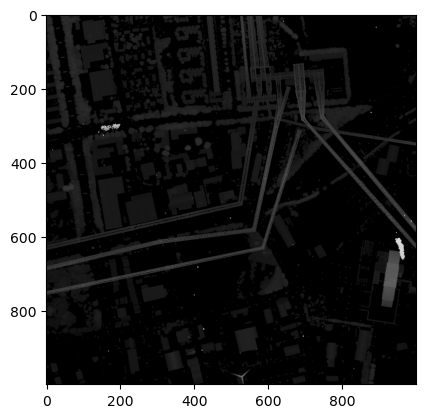

In [20]:
row_images = []
for i in range(amount_of_crops):
    # print((i+1)*amount_of_crops)
    # print(f"slice = {(i)*amount_of_crops} : {(i+1)*amount_of_crops} ")
    row_to_concat = image_list[(i)*amount_of_crops:(i+1)*amount_of_crops]
    #print(row_to_concat)
    # print(len(row_to_concat))

    stacked_array = np.concatenate([arr for arr in row_to_concat], axis=1)
    row_images.append(stacked_array)
combine_image = np.concatenate([arr for arr in row_images], axis=0)
plt.imshow(combine_image, cmap='gray')
plt.show()

In [3]:
folder = "/home/jf/data/denmark/raw/train"
files_names = list(glob.glob(folder+ "/ImagesGroundRemoved/*.tif"))
files_names = [filename.split('/')[-1].replace("_max.tif", '') for filename in files_names]
files_names


['PUNKTSKY_00005_1km_6146_468',
 'PUNKTSKY_00005_1km_6161_465',
 'PUNKTSKY_00005_1km_6205_513',
 'PUNKTSKY_00005_1km_6204_505',
 'PUNKTSKY_00005_1km_6167_473',
 'PUNKTSKY_00005_1km_6167_475',
 'PUNKTSKY_00005_1km_6167_474',
 'PUNKTSKY_00005_1km_6162_472',
 'PUNKTSKY_00005_1km_6134_518',
 'PUNKTSKY_00005_1km_6168_458',
 'PUNKTSKY_00005_1km_6163_472']

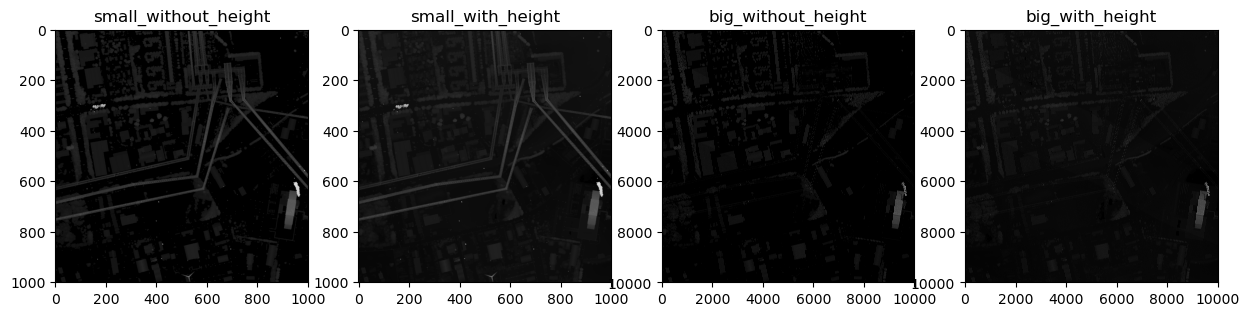

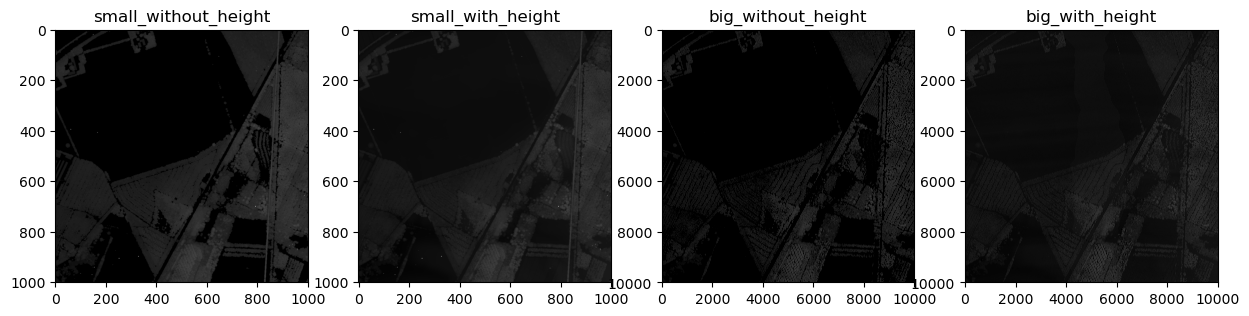

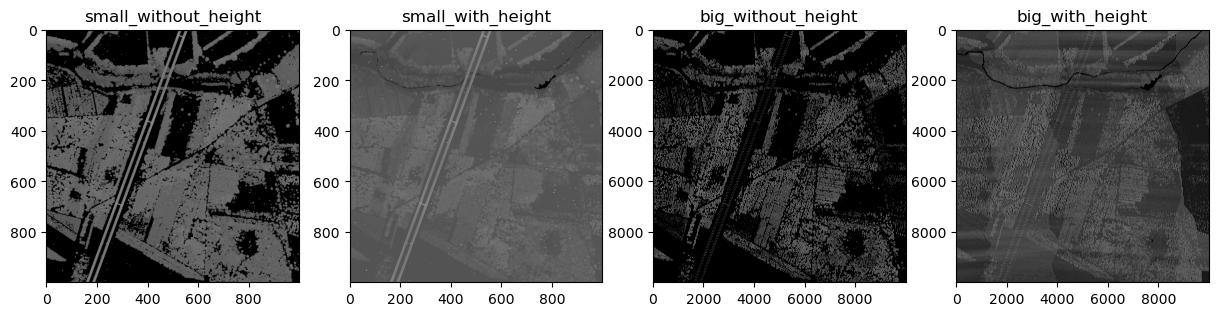

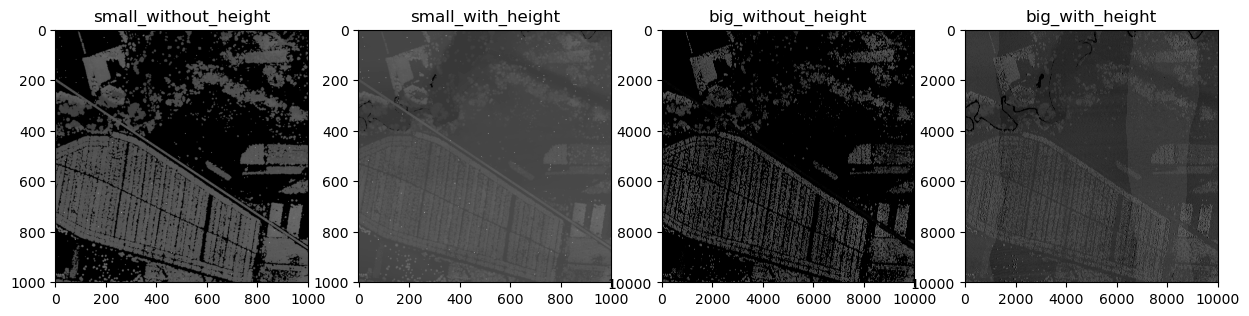

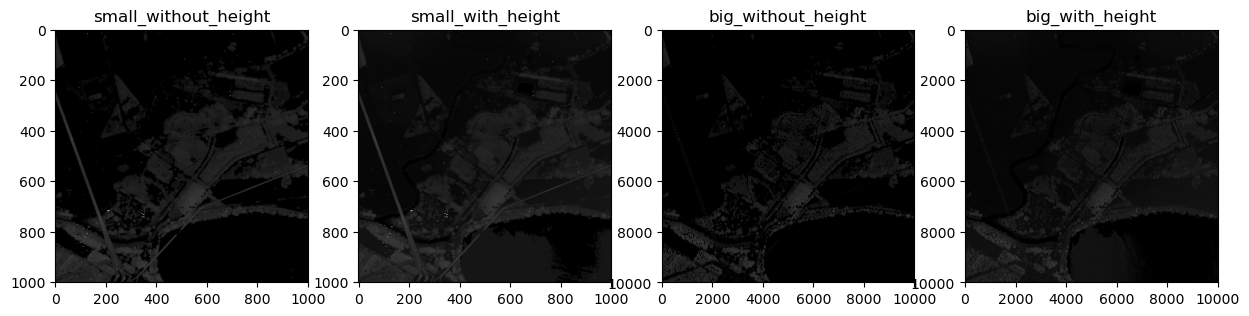

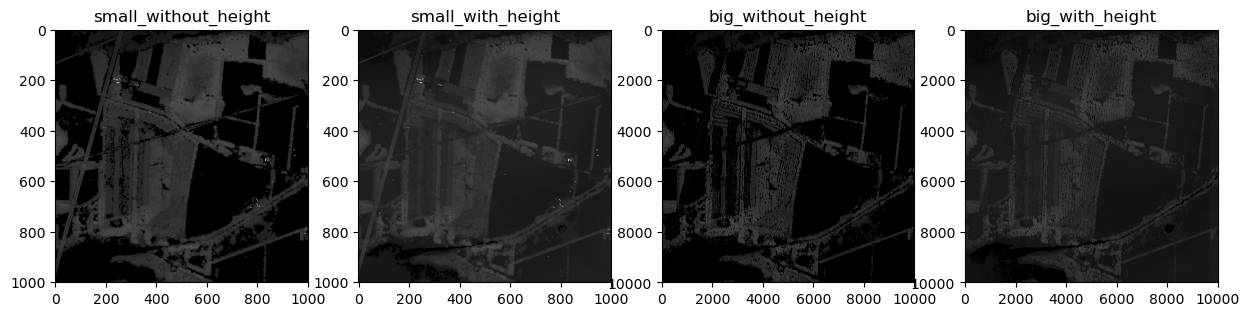

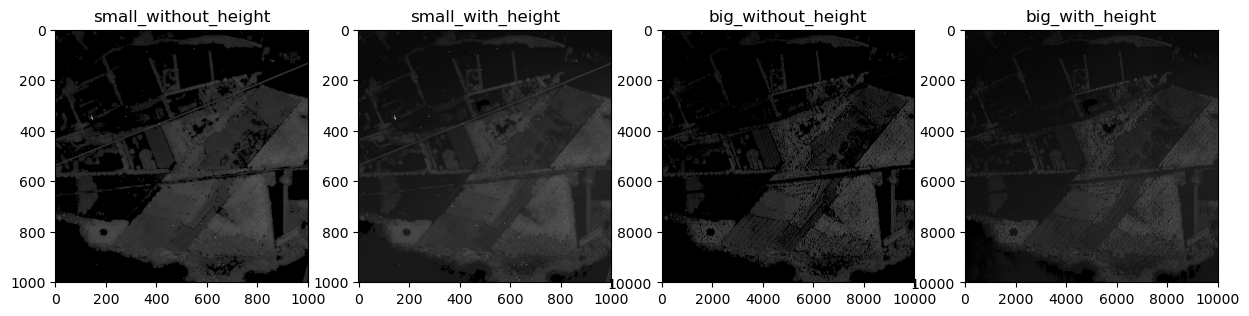

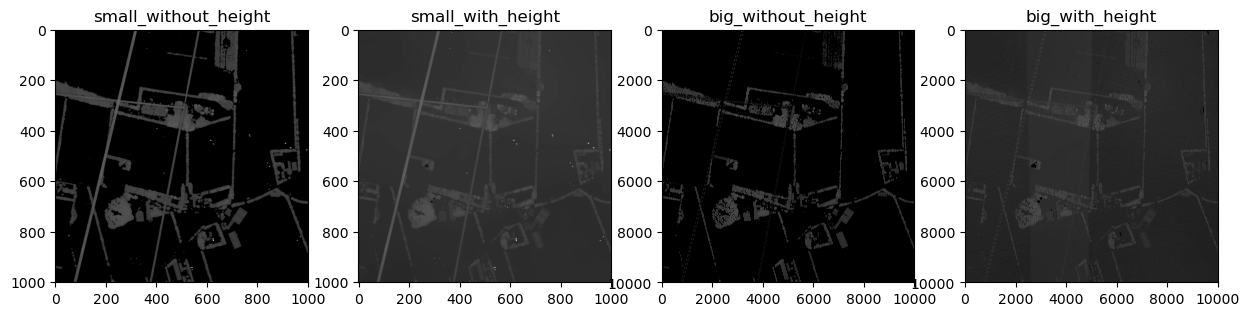

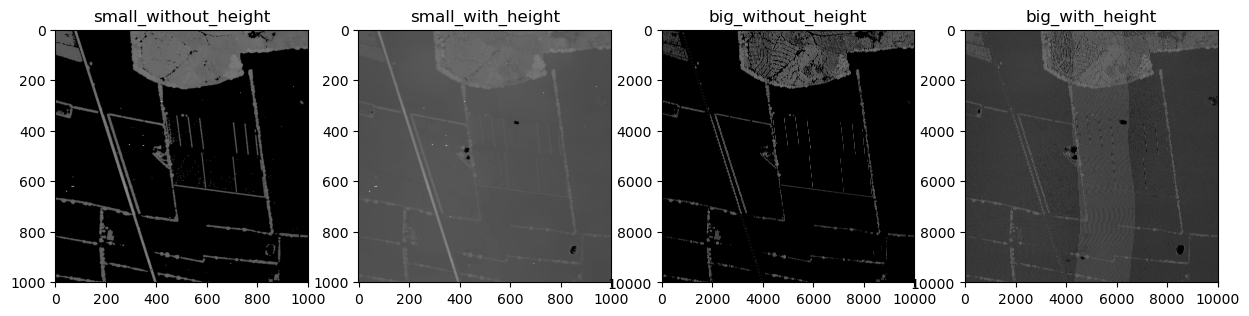

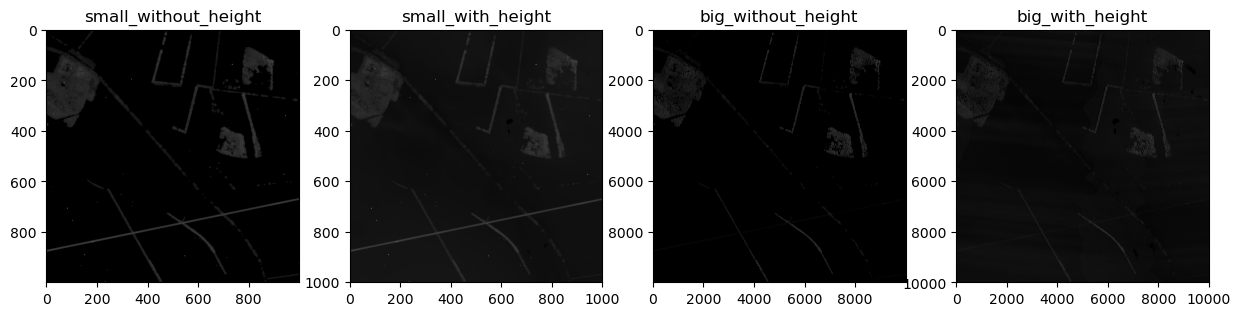

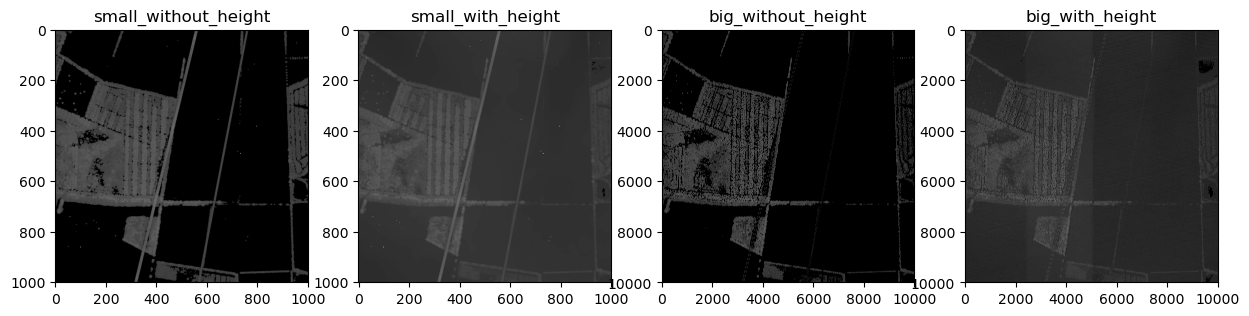

In [8]:
for filename in files_names:
    small_without_height = cv2.imread(f'{folder}/ImagesGroundRemoved/{filename}_max.tif', cv2.IMREAD_UNCHANGED)
    small_without_height = np.where(small_without_height >= 0, small_without_height, 0)
    small_without_height = small_without_height/np.max(small_without_height)
    small_without_height = (small_without_height*255).astype(np.uint8)


    small_with_height = cv2.imread(f'{folder}/RasterWithHeightSmall/{filename}_max.tif', cv2.IMREAD_UNCHANGED)
    small_with_height = np.where(small_with_height >= 0, small_with_height, 0)
    small_with_height = small_with_height/np.max(small_with_height)
    small_with_height = (small_with_height*255).astype(np.uint8)

    big_without_height = cv2.imread(f'{folder}/ImagesGroundRemovedLarge/{filename}_max.tif', cv2.IMREAD_UNCHANGED)
    big_without_height = np.where(big_without_height >= 0, big_without_height, 0)
    big_without_height = big_without_height/np.max(big_without_height)
    big_without_height = (big_without_height*255).astype(np.uint8)

    big_with_height = cv2.imread(f'{folder}/RasterWithHeight/{filename}_max.tif', cv2.IMREAD_UNCHANGED)
    big_with_height = np.where(big_with_height >= 0, big_with_height, 0)
    big_with_height = big_with_height/np.max(big_with_height)
    big_with_height = (big_with_height*255).astype(np.uint8)


    fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(15,15))
    ax0.set_title('small_without_height')
    ax0.imshow(small_without_height, cmap='gray')
    ax1.set_title('small_with_height')
    ax1.imshow(small_with_height, cmap='gray')
    ax2.set_title('big_without_height')
    ax2.imshow(big_without_height, cmap='gray')
    ax3.set_title('big_with_height')
    ax3.imshow(big_with_height, cmap='gray')


    #ax0.axis('off')
    #ax1.axis('off')
    #ax2.axis('off')
    plt.show()
